In [390]:
import torch
from torch import nn
from matplotlib import pyplot as plt

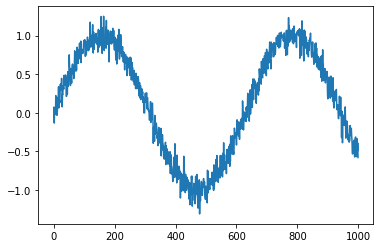

In [391]:
times = torch.arange(1000, dtype=torch.float32)
x = times * 1e-2
y = torch.sin(x) + torch.normal(0, 1e-1, size=x.shape)
plt.plot(times, y)

In [392]:
n_train = 996
n_step = 4
train_x = []
for i in range(1, n_train + 1):
    train_x.append(y[i:n_step + i])
# train_x = x[:n_train] 
# t = 4
train_x = torch.stack(train_x)
train_y = y[:n_train]

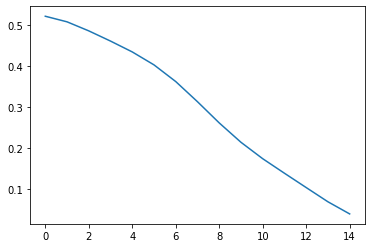

In [393]:
def get_model(n_in, n_out):
    return nn.Sequential(nn.Linear(n_in, 512), nn.Sigmoid(),
                         nn.Linear(512, n_out))

net = get_model(n_step, 1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-3)
optimizer.zero_grad()
net.zero_grad()
net.train()
losses = []
for i in range(15):
    y_hat = net(train_x)
    loss = loss_fn(train_y.unsqueeze(-1), y_hat)
    loss.backward()
    losses.append(loss.detach())
    optimizer.step()
    # print(f'loss: {loss:.3f}')
plt.plot(losses)


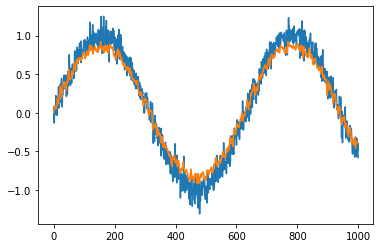

In [394]:
y_test = net(train_x)
plt.plot(times, y)
plt.plot(times[:n_train], y_test.detach())

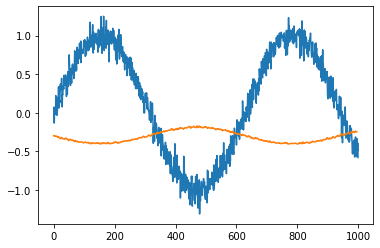

In [395]:
net2 = get_model(n_step, 1)
y_test2 = net2(train_x)
plt.plot(times, y)
plt.plot(times[:n_train], y_test2.detach())

/home/fyang/.local/lib/python3.10/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/home/fyang/.local/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


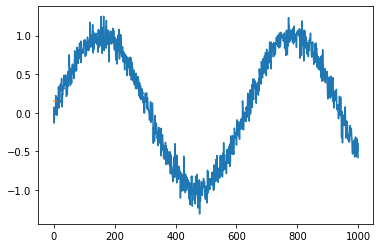

In [403]:
all = list(x[:n_step])
n_preds = 10
for i in range(n_preds):
    x = all[-n_step:]
    _x = torch.tensor(x)
    _y_hat = net(_x)
    all.append(_y_hat.detach())
plt.plot(times, y)
plt.plot(times[:n_preds], all[n_step:])